# Řešení diferenciální rovnice

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp
# from scipy import optimize

Pravá strana rovnice. Má první argument čas, druhý argument derivovanou veličinu, může mít parametry a tyto parametry mohou mít impicitní hodnoty. (Implicitní hodnoty se použijí, pokud není zadána jiná hodnota parametru.)

Následující funkce je pravou stranou logistické rovnice
$$\frac{\mathrm dy}{\mathrm dt}=ry\left(1-\frac yK\right).$$

In [43]:
def rovnice(t,y,r=1,K=1):
    return r*y*(1-y/K)

Nastavení počátečních podmínek je vhodné udělat mimo příkaz řešící rovnici, aby se případné modifikace dělaly vždy na jednom místě. Je vhodné sadu příkazů rozdělit do více buněk, aby se nepočítalo to, co není nutné počítat znovu. 

In [44]:
pocatecni_podminka = [0.1]
meze = [0,10]
t = np.linspace(0,10,100)

## Varianta 1: Chceme funkční předpis

Při volání funkce `solve_ivp` rovnou použijeme metodu `sol`. Výsledkem je funkce, do keré můžeme dosazovat libovolný čas mezi dolní a horní mezí a získáme hodnotu řešení v daném čase. Můžeme také dosazovat několik hodnot času současně a získáme funkční hodnotu pro každý časový okamžik.

In [62]:
reseni_spojite = solve_ivp(
                   rovnice,
                   meze,
                   pocatecni_podminka,
                   dense_output=True,
                   ).sol

In [63]:
reseni_spojite(1)

array([0.23199499])

In [64]:
reseni_spojite(t).shape

(1, 100)

In [65]:
reseni_spojite(t)[0].shape

(100,)

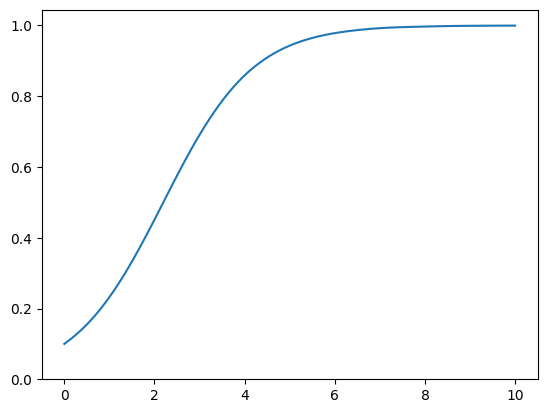

In [52]:
plt.plot(t,reseni_spojite(t)[0])
ax = plt.gca()
ax.set(ylim=(0,None));

## Varianta 2: Chceme data pro předem známé časy

Hodnoty času, pro které se má určit funkční hodnota řešení, se zadají při volání příkazu `solve_ivp` pomocí parametru `t_eval`.

In [66]:
reseni_data = solve_ivp(
                   rovnice,
                   meze,
                   pocatecni_podminka,
                   t_eval=t,
                   ).y
reseni_data.shape


(1, 100)

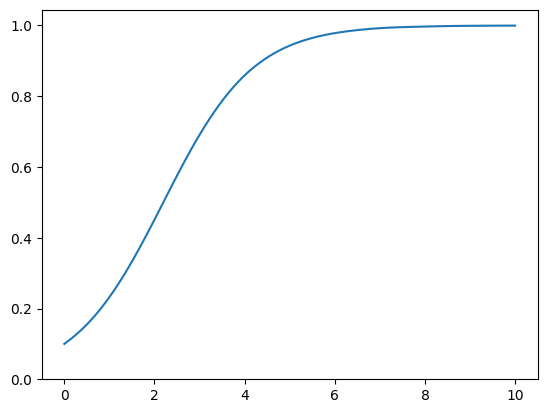

In [67]:
plt.plot(t,reseni_data[0])
ax = plt.gca()
ax.set(ylim=(0,None));

## Různé hodnoty parametrů

Pokud chceme určit chování řešení pro různé hodnoty parametrů, je nejvýhodnější řešit rovnici v každém případě pro stejné hodnoty času a výsledek uspořádat jako sloupce tabulky. Vytvoříme tedy seznam obsahující jednotlivé funkční hodnoty, sestavíme z nich tabulku a přidáme sloupec s časem. Poté můžeme dělat cokoliv, například řešení vykreslit.

In [77]:
parametry_r = [1,0.5,0.25]
parametry_K = [1,1,1]
meze_2 = [0,20]
t_2 = np.linspace(0,20,100)
reseni_data = [
                solve_ivp(
                   rovnice,
                   meze_2,
                   pocatecni_podminka,
                   t_eval=t_2,
                   args=args 
                   ).y[0]
                for args in zip(parametry_r,parametry_K)
            ]
reseni_data = pd.DataFrame(np.array(reseni_data).T,columns=parametry_r)
reseni_data["t"] = t_2
reseni_data

,1.0,0.5,0.25,t
0,0.100000,0.100000,0.100000,0.000000
1,0.119702,0.109465,0.104638,0.202020
2,0.142664,0.119707,0.109465,0.404040
3,0.169211,0.130767,0.114487,0.606061
4,0.199558,0.142683,0.119707,0.808081
...,...,...,...,...
95,0.999366,0.999297,0.931092,19.191919
96,0.999170,0.999342,0.934262,19.393939
97,0.999041,0.999394,0.937297,19.595960
98,0.999009,0.999451,0.940201,19.797980


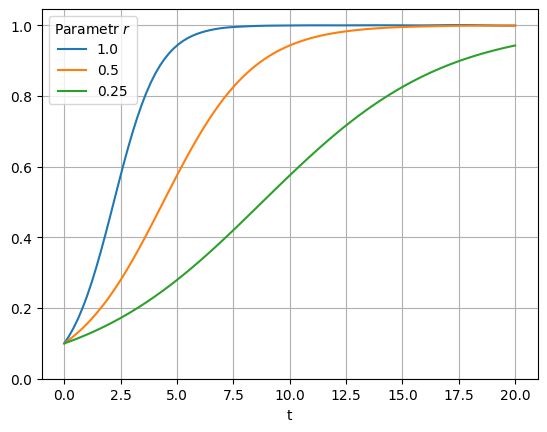

In [78]:
ax = reseni_data.plot(x="t")
plt.legend(title=r"Parametr $r$")
ax.set(ylim=(0,None))
ax.grid()